In [ ]:

# Install nirdizati-light package
!pip install git+https://github.com/rgraziosi-fbk/nirdizati-light

# If asked to reload runtime to update numpy version, click "yes"

  Cloning https://github.com/rgraziosi-fbk/nirdizati-light to /tmp/pip-req-build-9ljy87iw
  Running command git clone --filter=blob:none --quiet https://github.com/rgraziosi-fbk/nirdizati-light /tmp/pip-req-build-9ljy87iw
  Resolved https://github.com/rgraziosi-fbk/nirdizati-light to commit b6dbd5c6f730e1170212a13a602d8071cb4705a1
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/abuliga/DiCE.git (to revision origin/main) to /tmp/pip-install-rqqng0nb/dice-ml_418288219ac341cb926628ae1c8eccbf
  Running command git clone --filter=blob:none --quiet https://github.com/abuliga/DiCE.git /tmp/pip-install-rqqng0nb/dice-ml_418288219ac341cb926628ae1c8eccbf
  Running command git checkout -b origin/main --track origin/origin/main
  Switched to a new branch 'origin/main'
  Branch 'origin/main' set up to track remote branch 'origin/main' from 'origin'.
  Resolved https://github.com/abuliga/DiCE.git to commit 386bdb9fd431b962f791649707bc836a095656a3
  Preparing metadata (setup.py) 

In [ ]:
# Reinstall cupy-cuda12 to ensure compatibility
!pip uninstall -y cupy-cuda12x
!pip install cupy-cuda12x

Found existing installation: cupy-cuda12x 13.3.0
Uninstalling cupy-cuda12x-13.3.0:
  Successfully uninstalled cupy-cuda12x-13.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 MB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# Download an example log
!mkdir datasets
!wget "https://drive.google.com/uc?export=download&id=1qcx8F7nFo20kENuvBKWfQLidgi54adlv" -O datasets/bpic2012_O_ACCEPTED-COMPLETE_trunc.xes


mkdir: cannot create directory ‘datasets’: File exists
--2024-12-24 09:02:35--  https://drive.google.com/uc?export=download&id=1qcx8F7nFo20kENuvBKWfQLidgi54adlv
Resolving drive.google.com (drive.google.com)... 173.194.193.139, 173.194.193.100, 173.194.193.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.193.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qcx8F7nFo20kENuvBKWfQLidgi54adlv&export=download [following]
--2024-12-24 09:02:35--  https://drive.usercontent.google.com/download?id=1qcx8F7nFo20kENuvBKWfQLidgi54adlv&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.69.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99833831 (95M) [application/octet-stream]
Saving to: ‘datasets/bpic2012_O_ACCE

# Hands-on tutorial for Nirdizati light

# Prepare environment

In [ ]:
# Import required modules
import os
import random
import numpy as np

import pandas as pd
import pm4py

from nirdizati_light.log.common import get_log, split_train_val_test
from nirdizati_light.encoding.common import get_encoded_df, EncodingType
from nirdizati_light.encoding.constants import TaskGenerationType, PrefixLengthStrategy, EncodingTypeAttribute
from nirdizati_light.encoding.time_encoding import TimeEncodingType
from nirdizati_light.labeling.common import LabelTypes
from nirdizati_light.predictive_model.common import ClassificationMethods,RegressionMethods
from nirdizati_light.predictive_model.predictive_model import PredictiveModel
from nirdizati_light.hyperparameter_optimisation.common import retrieve_best_model, HyperoptTarget
from nirdizati_light.evaluation.common import evaluate_classifier, evaluate_classifiers, plot_model_comparison
from nirdizati_light.explanation.common import ExplainerType, explain

/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/cudf/pandas/__init__.py:64: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/dice_ml/utils/exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "


AttributeError: No attribute 'NumpyExtensionArray'

# Configure pipeline parameters

# Setting up the CONF dictionary
## Configuration Parameters for Process Mining in LaTeX

Below is the configuration dictionary `CONF` formatted in LaTeX. Each parameter is explained in detail.
The dictionary is the main objectives of the Nirdizati\_light framework. It specifies all required parameters to use when training multiple predictive model(s) for a given configuration, ranging from the train-test-val split ratio to the prefix lengths to be used and encodings to be used by the model.

---


## Configuration Dictionary: CONF


### **Paths**

\begin{aligned}
\textbf{data:} & \quad \text{'../datasets/bpic2012\_O\_ACCEPTED-COMPLETE/full.xes'} \quad \text{// Path to the dataset file.} \\
\textbf{output:} & \quad \text{'output\_data'} \quad \text{// Path to the directory where output data is saved.} \\
\end{aligned}


---

### **Dataset Splitting**
\begin{align*}
\textbf{train\_val\_test\_split:} & \quad [0.7, 0.1, 0.2] \quad \text{// Proportions for splitting the dataset into training, validation, and testing sets.} \\
& \quad \text{// Example: 70\% training, 10\% validation, 20\% testing.}
\end{align*}


---

### **Prefix Length**

\begin{aligned}
\textbf{prefix\_length\_strategy:} & \quad \text{PrefixLengthStrategy.FIXED.value}  \quad \text{// Strategy to define the prefix length (fixed in this case).} \\
\textbf{prefix\_length:} & \quad 10 \quad \text{// Specifies the fixed length of the prefix.} \\
\end{aligned}


---

### **Encoding**

\begin{align*}
\textbf{padding:} & \quad \text{True}  \quad \text{// Indicates whether to use padding in the encoding.} \\
\textbf{feature\_selection:} & \quad \text{EncodingType.SIMPLE.value}  \quad \text{// Specifies the encoding type for features (e.g., SIMPLE).} \\
\textbf{attribute\_encoding:} & \quad \text{EncodingTypeAttribute.LABEL.value}  \quad \text{// Attribute encoding strategy (e.g., LABEL).} \\
\textbf{time\_encoding:} & \quad \text{TimeEncodingType.NONE.value} \quad \text{// Defines the time encoding strategy (none in this case).}
\end{align*}


---

### **Labeling and Task Generation**
\begin{aligned}
\textbf{labeling\_type:} & \quad \text{LabelTypes.NEXT\_ACTIVITY.value} \quad \text{// Specifies the label type (next activity in this case).} \\
\textbf{task\_generation\_type:} & \quad \text{TaskGenerationType.ALL\_IN\_ONE.value} \quad \text{// Defines whether training is on a single prefix length or all lengths.} \\
\end{aligned}

---

### **Predictive Models and Hyperparameter Optimization**

\begin{aligned}
\textbf{predictive\_models:} & \quad \text{[
ClassificationMethods.MLP.value (Multi-Layer Perceptron),} \\
& \quad \text{ClassificationMethods.SGDCLASSIFIER.value (Stochastic Gradient Descent Classifier),} \\
& \quad \text{ClassificationMethods.SVM.value (Support Vector Machine) ,} \\
& \quad \text{ClassificationMethods.XGBOOST.value] (Extreme Gradient Boosting)} \\
& \quad \text{// List of predictive models to train.} \\
\textbf{hyperparameter\_optimisation\_target:} & \quad \text{HyperoptTarget.F1.value} \\
& \quad \text{// Metric to optimize during hyperparameter tuning.} \\
\textbf{hyperparameter\_optimisation\_evaluations:} & \quad 3 \quad \text{// Number of configurations to try during optimization for each model.} \\
\end{aligned}


---

### **Explainability**

\begin{aligned}
\textbf{explanator:} & \quad \text{ExplainerType.DICE.value} \\
& \quad \text{// Method used for explaining the model predictions.} \\
\end{aligned}


---

### **Other Parameters**

\begin{aligned}
\textbf{target\_event:} & \quad \text{None} \quad \text{// Specifies the target event, if applicable (NEXT\_EVENT ONLY).} \\
\textbf{seed:} & \quad \text{SEED} \quad \text{// Random seed to ensure reproducibility.} \\
\end{aligned}


---

This configuration setup provides a reproducible and flexible approach for predictive modeling in process mining tasks. Copy the LaTeX blocks into your Jupyter Notebook Markdown or use a Python cell to render the configuration dynamically.


In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)


# Configuration dictionary for nirdizati light
CONF = {
    # path to log
    'data': os.path.join('datasets', 'bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 25,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.SIMPLE.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.ATTRIBUTE_STRING.value,

    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        ClassificationMethods.DT.value,
        ClassificationMethods.RANDOM_FOREST.value,
        ClassificationMethods.MLP.value,
        #ClassificationMethods.KNN.value,
        #ClassificationMethods.LSTM.value,
        # ClassificationMethods.PERCEPTRON.value,
        # ClassificationMethods.SGDCLASSIFIER.value,
        #ClassificationMethods.SVM.value,
        # ClassificationMethods.XGBOOST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


MessageError: Error: credential propagation was unsuccessful

# Load log

In [ ]:
log = get_log(filepath=CONF['data'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


parsing log, completed traces ::   0%|          | 0/4685 [00:00<?, ?it/s]

# Encoding

# Explanation of the `get_encoded_df` Function Parameters

The function `get_encoded_df` encodes data from a process log to create:
1. An **encoder object** (`encoder`) that processes features or labels.
2. A fully encoded **DataFrame** (`full_df`) for machine learning tasks.

## Parameters:

1. **`log`**:
   - Likely a process event log or dataset containing sequential events for one or more processes.
   - Columns might include `case_id`, `activity`, `timestamp`, and other attributes.

2. **`feature_encoding_type`**:
   - Specifies the type of feature encoding:
     - `frequency`: Frequency-based encoding (e.g., count of activities).
     - `ordinal`: Maps categorical features to integers.
     - `one_hot`: One-hot encoding for categorical features.
     - `embedding`: Use embeddings for numerical representation.

3. **`prefix_length`**:
   - Determines the length of process prefixes to be used.
   - Affects how much history (number of events) is considered for features.

4. **`prefix_length_strategy`**:
   - Defines how prefixes are handled:
     - `fixed`: Use a fixed number of steps (e.g., only first $N$ steps).
     - `dynamic`: Variable-length prefixes, potentially based on case characteristics.

5. **`time_encoding_type`**:
   - Encodes timestamp-related features (e.g., weekday, hour, month, time since last event, time since case start):
     - `NONE`: Does not encode the relative time attributes.
     - `DATE`: Extracts date-related features like day-of-week or month.
     - `DURATION`: Encodes time differences between events, time since case start, etc.
     - `DATE_AND_DURATION`: Combines date and duration encodings.

6. **`attribute_encoding`**:
   - Specifies how to encode additional attributes:
     - `LABEL`: Encode attributes as labels (e.g., 'A', 'B', 'C').
     - `ONEHOT`: Use one-hot encoding for attributes.

7. **`padding`**:
   - Ensures uniform input length by padding shorter prefixes with default values (e.g., zeros).
   - Useful for models like RNNs or LSTMs requiring uniform input dimensions.

8. **`labeling_type`**:
   - Defines how labels are generated for classification or prediction:
     - `NEXT_ACTIVITY`: Predict the next activity in the process.
     - `ATTRIBUTE_STRING`: Predict the final outcome of a process instance.
     - `ATTRIBUTE_NUMBER`: Predict a numerical attribute value (e.g., case duration).
     - `REMAINING_TIME`: Predict the remaining time until case completion.
     - `DURATION`: Predict the duration of a case.

9. **`task_generation_type`**:
   - Specifies the type of task:
     - `CLASSIFICATION`: Assign discrete classes (e.g., case outcome as 'successful' or 'failed').
     - `REGRESSION`: Predict continuous values (e.g., REMAINING_TIME, DURATION).

10. **`target_event`**:
    - Focuses on a specific event in the process for next activity predictive tasks.
    - Example: A particular milestone activity or timestamp.

## Outputs:

1. **`encoder`**:
   - Object or function that transforms raw features into encoded forms.
   - Stores mappings (e.g., one-hot encoding maps, label encoders).

2. **`full_df`**:
   - Fully encoded DataFrame for model training.
   - Includes encoded features, labels, and optional padding for consistency.


## <span style="color: red;">WARNING:</span> When using encoder.decode(full_df), this modifies the full_df DataFrame in place. To encode the dataframe again, you need to re-run the encoding process with encoder.encode(full_df).


# PREFIX SELECTION STRATEGY

*testo in corsivo*### ALL_IN_ONE

In [ ]:
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type=EncodingType.SIMPLE.value,
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=TaskGenerationType.ALL_IN_ONE.value,
  target_event=CONF['target_event'],
)
encoder.decode(full_df
               )
full_df.head(10)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


KeyError: 'label'

### ONLY_THIS

In [ ]:
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type=EncodingType.SIMPLE.value,
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=TaskGenerationType.ONLY_THIS.value,
  target_event=CONF['target_event'],
)
encoder.decode(full_df
               )
full_df.head(10)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


KeyError: 'label'

## FREQUENCY ENCODING

In [ ]:
CONF['feature_selection'] = EncodingType.FREQUENCY.value

encoder, full_df_frequency = get_encoded_df(
  log=log,
  feature_encoding_type=EncodingType.SIMPLE.value,
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)
encoder.decode(full_df_frequency)

full_df_frequency.head(10)

In [ ]:
del full_df_frequency

## BINARY ENCODING

In [ ]:
CONF['feature_selection'] = EncodingType.BINARY.value

encoder, full_df_binary = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)
encoder.decode(full_df_binary)
full_df_binary.head(10)

In [ ]:
del full_df_binary

## SIMPLE_INDEX ENCODING

In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE.value

encoder, full_df_simple = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)
encoder.decode(full_df_simple)
full_df_simple.head(10)

In [ ]:
del full_df_simple

## SIMPLE_TRACE_INDEX_ENCODING

In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE_TRACE.value

encoder, full_df_simple_trace = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)
encoder.decode(full_df_simple_trace)
full_df_simple_trace.head(10)

In [ ]:
del full_df_simple_trace

## COMPLEX-INDEX ENCODING

In [ ]:
CONF['feature_selection'] = EncodingType.COMPLEX.value
encoder, full_df_complex = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)
encoder.decode(full_df_complex)

In [ ]:
full_df_complex.head(10)

In [ ]:
del full_df_complex

# Train/val/test splitting

# The **`shuffle`** parameter specifies whether to shuffle the dataset before splitting. By setting it to `False`, we ensure that the order of the dataset is maintained during splitting (`temporal split`).

In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE.value

encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],
)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
train_df.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,trace_id,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,prefix_9,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
0,173688,1,1,1,3,4,1,3,2,4,...,18,14,23,23,27,7,3,8,2,1
1,173691,1,1,1,3,4,4,8,1,2,...,18,12,10,10,14,25,22,24,22,1
2,173694,1,1,1,3,4,4,8,7,9,...,17,18,21,12,10,10,13,23,22,1
3,173715,1,1,1,3,4,4,8,1,5,...,18,14,23,23,27,5,11,25,0,0
4,173718,1,1,1,3,4,1,1,3,4,...,6,10,14,24,22,26,22,24,22,1


# Hyperparameter optimization

## The function `retrieve_best_model` performs hyperparameter optimization for the predictive models specified in the configuration dictionary (`CONF`). This is done using the `hyperopt` library to find the best hyperparameters for the models based on the specified target metric.
## A predefined optimization space is found for each model in nirdizati_light/hyperparameter_optimisation/common.py.
## Alternatively one can specify a custom optimization space for each model. (see run_full_pipeline.py for an example)

In [ ]:
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')

Running hyperparameter optimization on model DecisionTree...
 10%|█         | 1/10 [00:00<00:00,  9.82trial/s, best loss: -0.6151315789473684]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


100%|██████████| 10/10 [00:00<00:00, 12.18trial/s, best loss: -0.6971853769006794]
Running hyperparameter optimization on model randomForestClassifier...
100%|██████████| 10/10 [00:55<00:00,  5.54s/trial, best loss: -0.7542379127358491]
Running hyperparameter optimization on model mlp...
100%|██████████| 10/10 [00:26<00:00,  2.61s/trial, best loss: -0.7388392857142857]
Best model is randomForestClassifier


## Predictive Model Evaluation


### This is done based on the types of model that is instantiated: Classification Models use more traditional label-based mettrics (e.g. Accuracy, F1-Score, Precision, Recall), while Regression Models use errors (Root-Mean Squared Error (RMSE), Mean Absolute Error (MAE), etc.)

## Evaluation Metrics for Classification Models

- **F1 Score** (Macro average): Measures the balance between precision and recall.

- **Accuracy**: The proportion of correct predictions out of the total number of predictions.

- **Precision** (Macro average): The proportion of true positive predictions among all positive predictions.

- **Recall** (Macro average): The proportion of true positive predictions among all actual positives.

### Evaluation Metrics for Regression Models

- **RMSE**: Sensitive to large errors and penalizes larger errors more heavily, making it useful when large errors are undesirable.
- **MAE**: Simple to interpret and gives the average absolute error, which is easy to understand, but it doesn’t penalize large errors as much as RMSE.
- **R-squared**: Provides a measure of how well the model explains the variation in the data. Higher values indicate a better fit.
- **MAPE**: Gives the error as a percentage, which makes it easier to interpret in relation to the scale of the data.



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Evaluating best model...


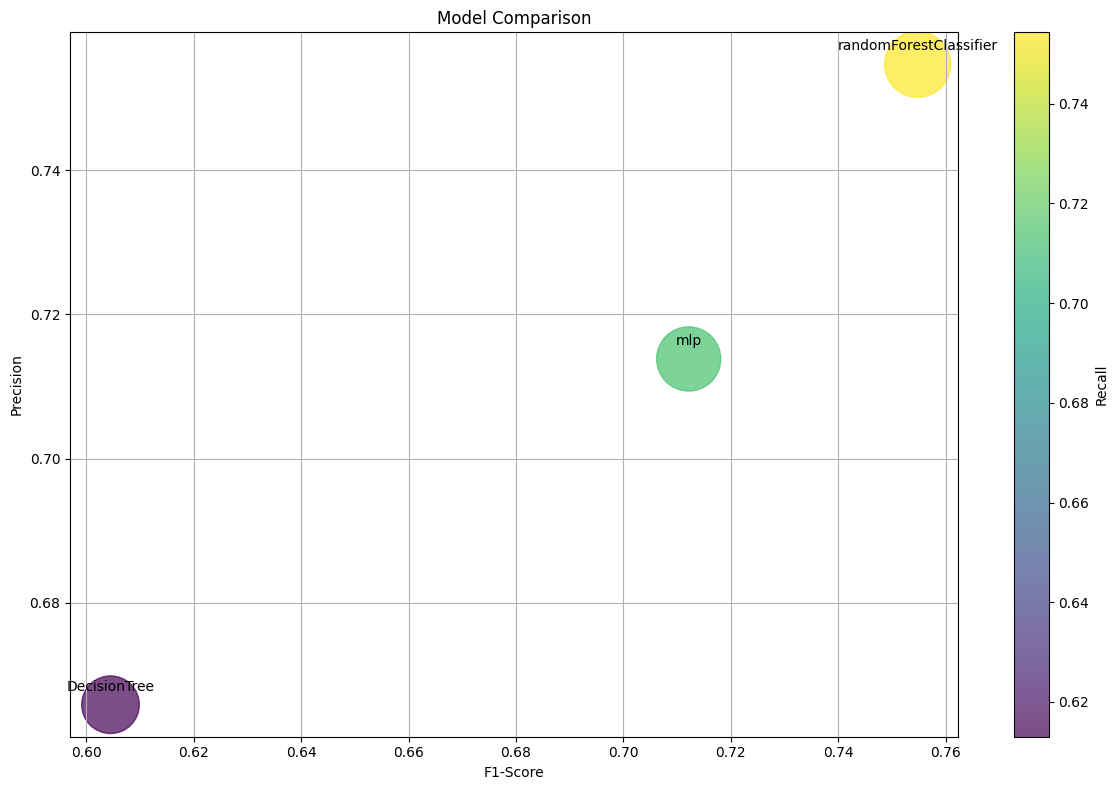

Evaluation: {'auc': 0.8498054740290766, 'f1_score': 0.7544357280421787, 'accuracy': 0.7547974413646056, 'precision': 0.7546576634453724, 'recall': 0.7543239369326327}


In [ ]:
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')

# EXERCISES

## EXERCISE 1:  Varying Prefix Lengths for Prediction


- Objective: Investigate how prefix lengths affect model performance.
- Steps:
  - Load the event log and label it for a outcome prediction task. (Predefined in the given event log)
  - Using the simple-index encoding, train a predictive model (Decision Tree) using prefix lengths of 3, 5, and 10.
  - Evaluate the model’s accuracy and compare the results.
- Questions:
  - How does the prediction accuracy vary with different prefix lengths?
  - What prefix length would you recommend for this task, and why?



In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)


# Configuration dictionary for nirdizati light
CONF = {
    # path to log
    'data': os.path.join('datasets', 'bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 25,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.SIMPLE.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.ATTRIBUTE_STRING.value,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        ClassificationMethods.DT.value,
        #ClassificationMethods.RANDOM_FOREST.value,
        #ClassificationMethods.MLP.value,
        #ClassificationMethods.KNN.value,
        #ClassificationMethods.LSTM.value,
        # ClassificationMethods.PERCEPTRON.value,
        # ClassificationMethods.SGDCLASSIFIER.value,
        #ClassificationMethods.SVM.value,
        # ClassificationMethods.XGBOOST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Available documentation can be found at: https://rgraziosi-fbk.github.io/nirdizati-light/nirdizati_light.html

In [ ]:
### YOUR CODE HERE
prefix_lengths = [15,20,25,30] #val1,val2,val3

res = []
for i,prefix in enumerate(prefix_lengths):
    CONF['prefix_length'] = prefix
    encoder, full_df = get_encoded_df(
      log=log,
      feature_encoding_type=CONF['feature_selection'],
      prefix_length=prefix,
      prefix_length_strategy=CONF['prefix_length_strategy'],
      time_encoding_type=CONF['time_encoding'],
      attribute_encoding=CONF['attribute_encoding'],
      padding=CONF['padding'],
      labeling_type=CONF['labeling_type'],
      task_generation_type=CONF['task_generation_type'],
      target_event=CONF['target_event'],)
    train_size, val_size, test_size = CONF['train_val_test_split']
    train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
    # Instantiate predictive models
    predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

    # Perform hyperparameter optimization
    best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
        predictive_models,
        max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
        target=CONF['hyperparameter_optimisation_target']
    )

    # Evaluate best model
    best_model = predictive_models[best_model_idx]
    best_model.model = best_model_model
    best_model.config = best_model_config
    print(f'Best model is {best_model.model_type}')
    print('Evaluating best model...')
    predicted, scores = best_model.predict(test=True)
    actual = test_df['label']

    initial_result = evaluate_classifier(actual, predicted, scores)
    results = evaluate_classifiers(predictive_models,actual)
    print(f'Evaluation: {initial_result}')
    initial_result['prefix'] = prefix
    pred_model_results = pd.DataFrame([initial_result])
    res.append(pred_model_results)
res_df = pd.concat(res)
print(res_df)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Running hyperparameter optimization on model DecisionTree...
100%|██████████| 10/10 [00:00<00:00, 32.41trial/s, best loss: -0.4514792899408284]
Running hyperparameter optimization on model randomForestClassifier...
100%|██████████| 10/10 [00:22<00:00,  2.22s/trial, best loss: -0.5396684499676128]
Running hyperparameter optimization on model mlp...
100%|██████████| 10/10 [00:24<00:00,  2.49s/trial, best loss: -0.5582208895552224]
Best model is mlp
Evaluating best model...
Evaluation: {'auc': 0.5483835005574136, 'f1_score': 0.511804250422377, 'accuracy': 0.5149253731343284, 'precision': 0.5184210526315789, 'recall': 0.517773530817009}
Running hyperparameter optimization on model DecisionTree...
100%|██████████| 10/10 [00:00<00:00, 19.52trial/s, best loss: -0.6452814396317221]
Running hyperparameter optimization on model randomForestClassifier...
100%|██████████| 10/10 [00:34<00:00,  3.50s/trial, best loss: -0.671798296877609]
Running hyperparameter optimization on model mlp...
100%|█████

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: xlabel='prefix'>

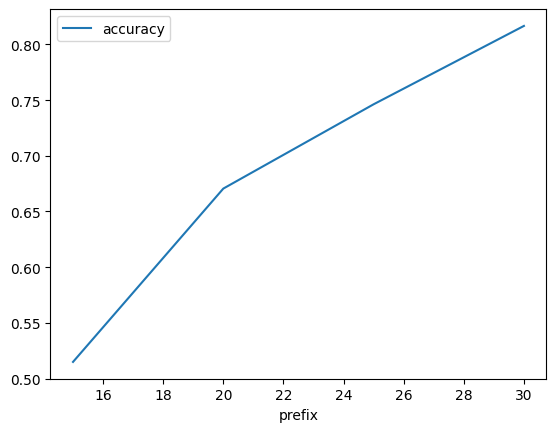

In [ ]:
res_df.plot(x='prefix',y='accuracy')

How does the prediction accuracy vary with different prefix lenghts? There is no big difference but prefix 10 is the best


What prefix length would you recommend for this task, and why? 10, It has the best precision and a good recall.


## Exercise 2: Experimenting with Encoding Techniques
### Objective:
 - Understand how different prefix encoding methods influence model performance.
### Steps:
- Use the same event log and prediction task as in Exercise 1.
- Based on the results from Exercise 1, use the prefix length that returned the best model performance results.
- Experiment with at least three encoding methods (simple-index encoding, complex-index encoding, frequency, binary).
- Train the same predictive model (Decision Tree model) with each encoding method.
- Compare the results in terms of accuracy.
### Questions:
- Which encoding technique yields the highest accuracy? Why?
- What is the prefix encoding technique you would recommend for this task, and why?


In [ ]:
CONF

In [ ]:
### YOUR CODE HERE
encoding_methods = [EncodingType.FREQUENCY.value,EncodingType.SIMPLE.value, EncodingType.COMPLEX.value] #encoding 1, encoding 2, encoding 3 (see Notebook above)

res = []
for i,encoding in enumerate(encoding_methods):
    CONF['feature_selection'] = encoding
    encoder, full_df = get_encoded_df(
      log=log,
      feature_encoding_type = CONF['feature_selection'],
      prefix_length=30, # Replace 3 dots with previous prefix length
      prefix_length_strategy=CONF['prefix_length_strategy'],
      time_encoding_type=CONF['time_encoding'],
      attribute_encoding=CONF['attribute_encoding'],
      padding=CONF['padding'],
      labeling_type=CONF['labeling_type'],
      task_generation_type=CONF['task_generation_type'],
      target_event=CONF['target_event'],)
    train_size, val_size, test_size = CONF['train_val_test_split']
    train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
    # Instantiate predictive models
    predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

    # Perform hyperparameter optimization
    best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
        predictive_models,
        max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
        target=CONF['hyperparameter_optimisation_target']
    )

    # Evaluate best model
    best_model = predictive_models[best_model_idx]
    best_model.model = best_model_model
    best_model.config = best_model_config
    print(f'Best model is {best_model.model_type}')
    print('Evaluating best model...')
    predicted, scores = best_model.predict(test=True)
    actual = test_df['label']

    initial_result = evaluate_classifier(actual, predicted, scores)
    results = evaluate_classifiers(predictive_models,actual)
    print(f'Evaluation: {initial_result}')
    initial_result['encoding'] = encoding
    pred_model_results = pd.DataFrame([initial_result])
    res.append(pred_model_results)
res_df = pd.concat(res)

In [ ]:
res_df

## Here we see the Frequency encoding performing best, possibly due to including the frequency of the activity O_ACCEPTED, which is the main condition leading to a positive prediction (when frequency larger than 0)

## Exercise 3: Exploring Predictive Models
### Objective: Evaluate the performance of different predictive models on the same event log.
### Steps:
- Use the best prefix length and prefix encoding combination on the same event log.
- Select at least three different predictive models (e.g., Random Forest, Gradient Boosting, Neural Network).
- Train and evaluate the models using the default hyperparameters.
- Compare the models using accuracy metrics (e.g., F1-score, precision, recall) and register time metrics (e.g., hyperparameter optimisation time).
### Questions:
- Which predictive model performs best in terms of accuracy metrics?
- Which predictive model is the most efficient in terms of optimisation time?
- How would you interpret the trade-offs between accuracy and time metrics?

In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

# Name of the log to use
# Configuration dictionary for nirdizati light"
CONF = {
    # path to log
    'data': os.path.join('bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 30,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.FREQUENCY.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.ATTRIBUTE_STRING.value,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        ClassificationMethods.DT.value,
        ClassificationMethods.RANDOM_FOREST.value,
        ClassificationMethods.MLP.value,
        #ClassificationMethods.KNN.value,
        #ClassificationMethods.LSTM.value,
        # ClassificationMethods.PERCEPTRON.value,
        # ClassificationMethods.SGDCLASSIFIER.value,
        #ClassificationMethods.SVM.value,
        # ClassificationMethods.XGBOOST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

In [ ]:
### STARTING POINT
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type = CONF['feature_selection'],
  prefix_length= CONF['prefix_length'], # Replace 3 dots with previous prefix length
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
### YOUR CODE HERE###
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')


In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE_TRACE.value

### STARTING POINT
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type = CONF['feature_selection'],
  prefix_length= CONF['prefix_length'], # Replace 3 dots with previous prefix length
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
### YOUR CODE HERE###
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')


## Exercise 4: Comparing Models Across Tasks
### Objective: Compare the performance of models across different prediction tasks.
- Steps:
  - Use the best prefix length and prefix encoding combination on the same event log.
  - Run as prediction tasks the next activity, outcome, duration, and remaining time prediction tasks.
  - Train and evaluate the same model (Random Forest) for each task.
  - Compare model performances within and across tasks.
- Questions:
  - Do models perform consistently across different tasks? (Hint: igh accuracy for classification, low errors for regression)
  - How might the nature of the task influence model selection?


In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

# Name of the log to use
# Configuration dictionary for nirdizati light"
CONF = {
    # path to log
    'data': os.path.join('bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 30,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.FREQUENCY.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.ATTRIBUTE_STRING.value,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        #ClassificationMethods.DT.value,
        ClassificationMethods.RANDOM_FOREST.value,
        #ClassificationMethods.MLP.value,
        #ClassificationMethods.KNN.value,
        #ClassificationMethods.LSTM.value,
        # ClassificationMethods.PERCEPTRON.value,
        # ClassificationMethods.SGDCLASSIFIER.value,
        #ClassificationMethods.SVM.value,
        # ClassificationMethods.XGBOOST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

## OUTCOME PREDICTION AS BEFORE

In [ ]:
CONF['feature_selection'] = EncodingType.FREQUENCY.value
### STARTING POINT
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type = CONF['feature_selection'],
  prefix_length= CONF['prefix_length'], # Replace 3 dots with previous prefix length
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
### YOUR CODE HERE###
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')


## NEXT ACTIVITY PREDICTION

In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

# Name of the log to use
# Configuration dictionary for nirdizati light"
CONF = {
    # path to log
    'data': os.path.join('bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 30,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.FREQUENCY.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.NEXT_ACTIVITY.value,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        #ClassificationMethods.DT.value,
        ClassificationMethods.RANDOM_FOREST.value,
        #ClassificationMethods.MLP.value,
        #ClassificationMethods.KNN.value,
        #ClassificationMethods.LSTM.value,
        # ClassificationMethods.PERCEPTRON.value,
        # ClassificationMethods.SGDCLASSIFIER.value,
        #ClassificationMethods.SVM.value,
        # ClassificationMethods.XGBOOST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE_TRACE.value
### STARTING POINT
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type = CONF['feature_selection'],
  prefix_length= CONF['prefix_length'], # Replace 3 dots with previous prefix length
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
### YOUR CODE HERE###
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')




### REMAINING TIME PREDICTION


In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

# Name of the log to use
# Configuration dictionary for nirdizati light"
CONF = {
    # path to log
    'data': os.path.join('bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 30,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.FREQUENCY.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity, remaining time)
    'labeling_type': # YOURCODEHERE
    ,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        #YOUR CODE HERE
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.MAE.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 10,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

In [ ]:
CONF['feature_selection'] = EncodingType.SIMPLE_TRACE.value
### STARTING POINT
encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type = CONF['feature_selection'],
  prefix_length= CONF['prefix_length'], # Replace 3 dots with previous prefix length
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
### YOUR CODE HERE###
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=CONF['hyperparameter_optimisation_evaluations'],
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
plot_model_comparison(results)
print(f'Evaluation: {initial_result}')


# EXERCISE 5 EXPLAINABILITY

Given a trained predictive model (we will focus on the outcome prediction, thus LabelTypes.ATTRIBUTE_STRING.value), we want to generate some explanations for these models, either factual or counterfactual. We will have a look at a state-of-the-art XAI method (SHAP) and a counterfactual generation method.

As before, we define our CONF dictionary with all the requires parameters. Note the 'explanator' part tha we fix as Diverse Counterfactual explanations (DiCE). We will also check how SHAP functions as well, as each of these techniques require defining different parameters.

- Objective: Investigate how different explanation techniques (also with different scopes) offer different insights into how the model learns its correlations with the outcome
- Steps:
  - Define the CONF dictionary and train a predictive model (Random Forest Classifier) using the simple-index encoding and a prefix length of 25 (HINT: HAVE TO INPUT INTO THE CELL BELOW)
  - Use SHAP to generate explanations for both a single prediction where the outcome is negative (outcome 0 when encoded) and also for the whole RF model over this class (see below)
  - For the same prediction, generate a set of counterfactual explanations using DiCE.
  - Observe the differences in the feature importances from SHAP and the changes that are made to the input in the counterfactual explanations
- Questions:
 - How do the explanations generated by SHAP for the single trace align with the global ones in terms of the importance of each feature.
 - Do the explanations returned by SHAP match the changes of the counterfactuals?




In [ ]:
# Set a seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)


# Configuration dictionary for nirdizati light
CONF = {
    # path to log
    'data': os.path.join('datasets', 'bpic2012_O_ACCEPTED-COMPLETE_trunc.xes'),
    # train-validation-test set split percentages
    'train_val_test_split': [0.7, 0.1, 0.2],

    # path to output folder
    'output': 'output_data',

    'prefix_length_strategy': PrefixLengthStrategy.FIXED.value,
    'prefix_length': 25,
    # whether to use padding or not in encoding
    'padding': True,
    # which encoding to use
    'feature_selection': EncodingType.SIMPLE_TRACE.value,
    # which attribute encoding to use
    'attribute_encoding': EncodingTypeAttribute.LABEL.value,
    # which time encoding to use
    'time_encoding': TimeEncodingType.NONE.value,

    # the label to be predicted (e.g. outcome, next activity)
    'labeling_type': LabelTypes.ATTRIBUTE_STRING.value,
    # whether the model should be trained on the specified prefix length (ONLY_THIS) or to every prefix in range [1, prefix_length] (ALL_IN_ONE)
    'task_generation_type': TaskGenerationType.ONLY_THIS.value,

    # list of predictive models and their respective hyperparameter optimization space
    # if it is None, then the default hyperopt space will be used; otherwise, the provided space will be used
    'predictive_models': [
        ClassificationMethods.RANDOM_FOREST.value,
    ],

    # which metric to optimize hyperparameters for
    'hyperparameter_optimisation_target': HyperoptTarget.F1.value,
    # number of hyperparameter configurations to try
    'hyperparameter_optimisation_evaluations': 20,

    # explainability method to use
    'explanator': ExplainerType.DICE.value,

    'target_event': None,
    'seed': SEED,
}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:

encoder, full_df = get_encoded_df(
  log=log,
  feature_encoding_type=CONF['feature_selection'],
  prefix_length=CONF['prefix_length'],
  prefix_length_strategy=CONF['prefix_length_strategy'],
  time_encoding_type=CONF['time_encoding'],
  attribute_encoding=CONF['attribute_encoding'],
  padding=CONF['padding'],
  labeling_type=CONF['labeling_type'],
  task_generation_type=CONF['task_generation_type'],
  target_event=CONF['target_event'],)
train_size, val_size, test_size = CONF['train_val_test_split']
train_df, val_df, test_df = split_train_val_test(full_df, train_size, val_size, test_size, shuffle=False, seed=CONF['seed'])
# Instantiate predictive models
predictive_models = [PredictiveModel(predictive_model, train_df, val_df, test_df, prefix_length=CONF['prefix_length']) for predictive_model in CONF['predictive_models']]

# Perform hyperparameter optimization
best_candidates, best_model_idx, best_model_model, best_model_config = retrieve_best_model(
    predictive_models,
    max_evaluations=20,
    target=CONF['hyperparameter_optimisation_target']
)

# Evaluate best model
best_model = predictive_models[best_model_idx]
best_model.model = best_model_model
best_model.config = best_model_config
print(f'Best model is {best_model.model_type}')
print('Evaluating best model...')
predicted, scores = best_model.predict(test=True)
actual = test_df['label']

initial_result = evaluate_classifier(actual, predicted, scores)
results = evaluate_classifiers(predictive_models,actual)
print(f'Evaluation: {initial_result}')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


column: AMOUNT_REQ considered number, top 5 values are: [20000.0, 5000.0, 7000.0, 45000.0, 15000.0]
Running hyperparameter optimization on model randomForestClassifier...
100%|██████████| 20/20 [01:30<00:00,  4.52s/trial, best loss: -0.7608011971912052]
Best model is randomForestClassifier
Evaluating best model...
Evaluation: {'auc': 0.8501626737651582, 'f1_score': 0.7589292212518195, 'accuracy': 0.7590618336886994, 'precision': 0.7588825677476273, 'recall': 0.7590380633858895}


In [ ]:
CONF['explanator'] = 'shap'

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
encoder.encode(test_df_correct)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
test_df_correct[test_df_correct['trace_id']=='214037'].to_numpy()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([['214037', 32000.0, 'A_SUBMITTED-COMPLETE',
        'A_PARTLYSUBMITTED-COMPLETE', 'A_PREACCEPTED-COMPLETE',
        'W_Completeren aanvraag-SCHEDULE',
        'W_Completeren aanvraag-START', 'A_ACCEPTED-COMPLETE',
        'O_SELECTED-COMPLETE', 'A_FINALIZED-COMPLETE',
        'O_CREATED-COMPLETE', 'O_SENT-COMPLETE',
        'W_Nabellen offertes-SCHEDULE',
        'W_Completeren aanvraag-COMPLETE', 'W_Nabellen offertes-START',
        'A_CANCELLED-COMPLETE', 'O_CANCELLED-COMPLETE',
        'W_Nabellen offertes-COMPLETE', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', 'false']], dtype=object)

In [ ]:
import shap

# Here we have to select a single trace to explain from the test_df and then use its trace_id as a parameter in the explain function. The exp object contains the feature importances as well as the data
# required to plot the explanation (you can do this using the shap.plots.waterfall())
# HINT: Look at the explanation object, make sure you plot only the explanation part that is concerned with the predicted outcome of the trace
# You can check this using best_model.model.predict(test_df.iloc[[i],1:-1].values)) where i is the index of the trace in test_df

target_trace_id = test_df.iloc[1,0]

exp = explain(CONF, best_model, encoder=encoder,df=train_df, test_df=test_df, target_trace_id=target_trace_id)


print(exp)# YOUR CODE HERE FOR THE PLOT

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


.values =
array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [-0.00118594,  0.00118594],
        [-0.00077123,  0.00077123],
        [-0.00255661,  0.00255661],
        [-0.01358139,  0.01358139],
        [-0.00281289,  0.00281289],
        [-0.0008582 ,  0.0008582 ],
        [-0.00360716,  0.00360716],
        [-0.00561571,  0.00561571],
        [-0.00208624,  0.00208624],
        [-0.00250123,  0.00250123],
        [-0.00096796,  0.00096796],
        [-0.01509032,  0.01509032],
        [-0.01054788,  0.01054788],
        [-0.01716729,  0.01716729],
        [-0.00199882,  0.00199882],
        [ 0.00232393, -0.00232393],
        [ 0.02437636, -0.02437636],
        [ 0.00817899, -0.00817899],
        [ 0.01488921, -0.01488921],
        [ 0.00388798, -0.00388798],
        [ 0.01780019, -0.01780019],
        [ 0.01779207, -0.01779207],
        [ 0.06750767, -0.06750767]]])

.base_values =
array([[0.52959243, 0.47040757]])

.data =
                  prefix_1   

In [ ]:
exp[0,:,0]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


.values =
array([ 0.        ,  0.        , -0.00118594, -0.00077123, -0.00255661,
       -0.01358139, -0.00281289, -0.0008582 , -0.00360716, -0.00561571,
       -0.00208624, -0.00250123, -0.00096796, -0.01509032, -0.01054788,
       -0.01716729, -0.00199882,  0.00232393,  0.02437636,  0.00817899,
        0.01488921,  0.00388798,  0.01780019,  0.01779207,  0.06750767])

.base_values =
0.5295924334405127

.data =
prefix_1                A_SUBMITTED-COMPLETE
prefix_2          A_PARTLYSUBMITTED-COMPLETE
prefix_3              A_PREACCEPTED-COMPLETE
prefix_4     W_Completeren aanvraag-SCHEDULE
prefix_5        W_Completeren aanvraag-START
prefix_6                 A_ACCEPTED-COMPLETE
prefix_7                A_FINALIZED-COMPLETE
prefix_8                 O_SELECTED-COMPLETE
prefix_9                  O_CREATED-COMPLETE
prefix_10                    O_SENT-COMPLETE
prefix_11       W_Nabellen offertes-SCHEDULE
prefix_12    W_Completeren aanvraag-COMPLETE
prefix_13          W_Nabellen offertes-START


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


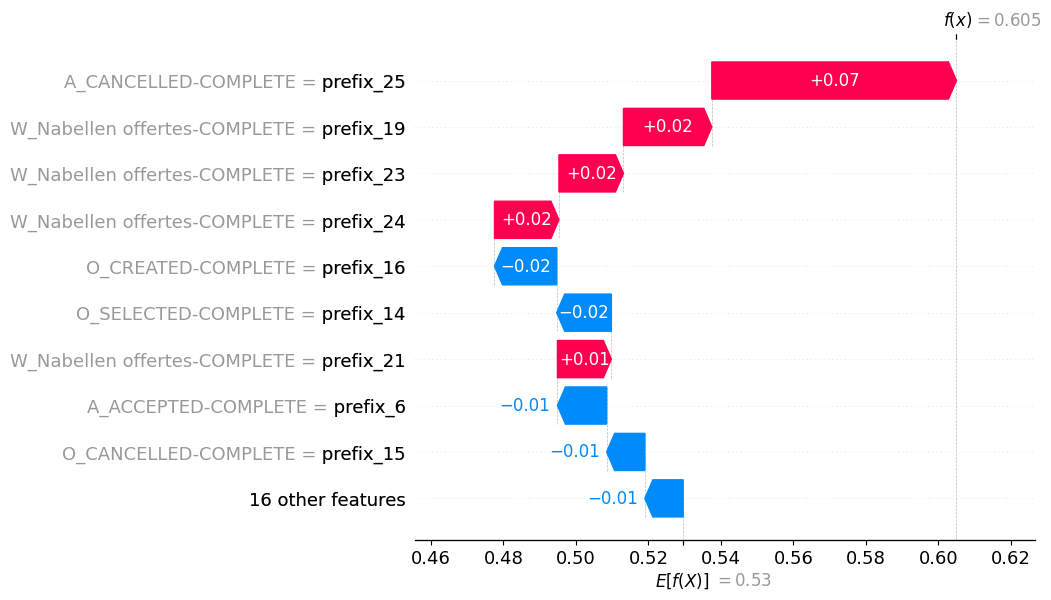

In [ ]:
shap.plots.waterfall(exp[0
,:, 0])


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


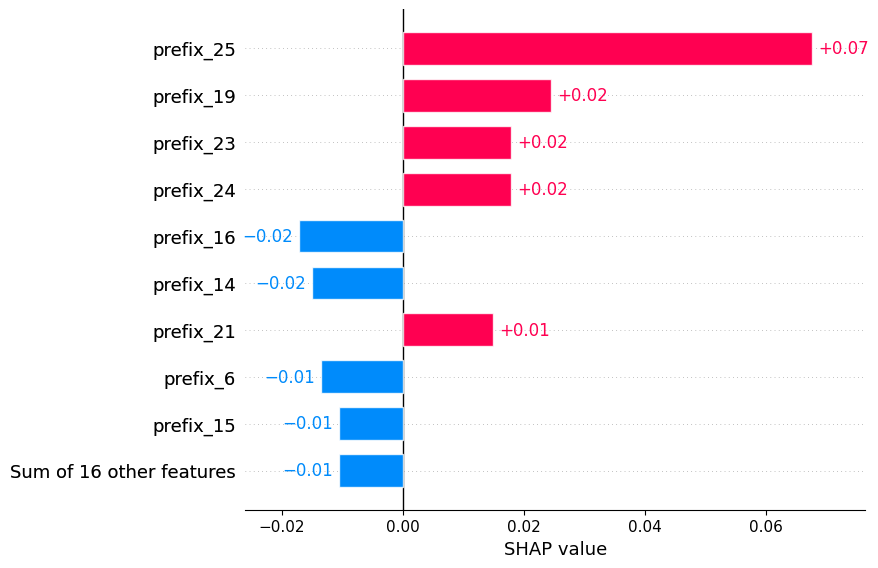

In [ ]:
#EXPECTED OUTPUT
shap.plots.bar(exp[0][:, 0])

In [ ]:
# HERE WE WANT TO GENERATE AN EXPLANATION FOR THE WHOLE TEST SET SO WE DO NOT NEED TO SPECIFY THE TARGET_TRACE_ID
exp = explain(CONF, best_model, encoder=encoder,df=train_df, test_df=test_df)
#HINT: CHECK THE SHAPE OF THE EXP OBJECT, use the shap.summary_plot function, which should take as input the expected values for the single class, the data from exp, and the feature names from exp

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


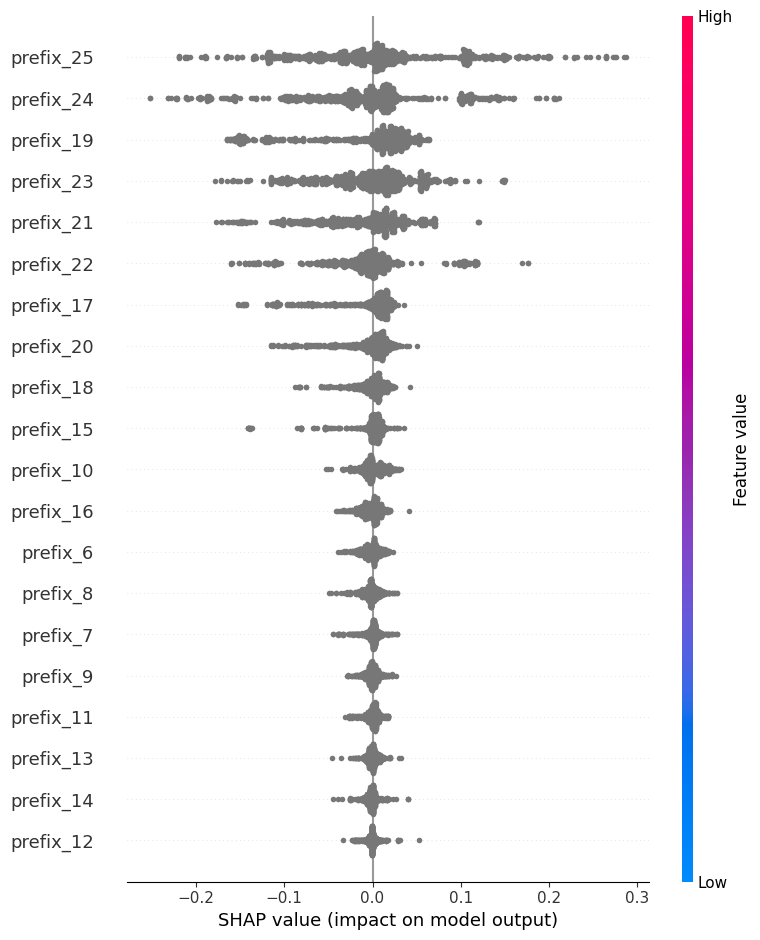

In [ ]:
# EXPECTED OUTPUT
shap.summary_plot(exp.values[:,:,0], exp.data, feature_names=exp.feature_names)

## Generating counterfactual explanations using DiCE

So we have explored generating factual local and global explanations for our input trace. We can now explore counterfactual explanations for the same trace by checking which of the features we would have to change in order to flip the outcome of the trace.

We will use the 'genetic_conformance' method with a support of 0.95, and we will try the adapted=False method.

Make sure that the target trace id is the same one used previously.

All missing inputs are highlighted with the ...

Note that the code also runsn the process discovery of the Declare Constraints which may take some time

In [ ]:
CONF['explanator'] = 'dice'

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
CONF

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


{'data': 'datasets/bpic2012_O_ACCEPTED-COMPLETE_trunc.xes',
 'train_val_test_split': [0.7, 0.1, 0.2],
 'output': 'output_data',
 'prefix_length_strategy': 'fixed',
 'prefix_length': 25,
 'padding': True,
 'feature_selection': 'simple',
 'attribute_encoding': 'label',
 'time_encoding': 'none',
 'labeling_type': 'label_attribute_string',
 'task_generation_type': 'only_this',
 'predictive_models': ['randomForestClassifier'],
 'hyperparameter_optimisation_target': 'f1_score',
 'hyperparameter_optimisation_evaluations': 10,
 'explanator': 'dice',
 'target_event': None,
 'seed': 1234}

In [ ]:
test_df_correct = test_df[(test_df['label'] == predicted) & (test_df['label'] == 0)]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
test_df

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,trace_id,AMOUNT_REQ,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
3747,204454,0.070472,1,1,1,3,4,4,8,7,...,18,14,23,23,27,8,3,7,2,1
3748,204466,0.100783,1,1,1,3,4,1,1,3,...,10,23,19,25,22,26,22,22,4,0
3749,204469,0.050265,1,1,1,3,4,4,8,7,...,7,13,20,18,24,24,24,14,26,0
3750,204472,0.070472,1,1,2,1,1,5,4,9,...,16,24,19,25,22,26,22,24,22,0
3751,204475,0.100783,1,1,1,3,4,4,8,7,...,9,6,11,13,23,18,24,22,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,214238,0.378631,1,1,1,3,4,4,8,1,...,18,22,21,14,26,24,27,25,27,1
4681,214250,0.100783,1,1,1,3,4,1,1,3,...,19,22,24,3,8,8,2,25,0,1
4682,214268,0.252336,1,1,1,3,4,4,8,7,...,17,18,21,14,26,24,27,25,27,1
4683,214277,0.272544,1,1,1,3,4,4,8,1,...,18,14,23,23,27,27,27,8,2,1


In [ ]:
test_df_correct = test_df[(test_df['label'] == predicted) & (test_df['label'] == 0)]
cf_dataset = pd.concat([train_df, val_df], ignore_index=True)
full_df = pd.concat([train_df, val_df, test_df])

target_trace_id = test_df_correct.iloc[0,0]

cf_results = explain(CONF, best_model, encoder=encoder, df=train_df.iloc[:, 1:],
        query_instances=test_df_correct,target_trace_id='214037',
        method='genetic_conformance', optimization='baseline',
        heuristic='heuristic_2', support=0.95,
        timestamp_col_name='Complete Timestamp', # name of the timestamp column in the log
        model_path='./experiments/process_models/process_models',
        random_seed=CONF['seed'], adapted=False, filtering=False)
counterfactuals = cf_results.cf_examples_list[0].final_cfs_df.copy()

encoder.decode(counterfactuals)

encoder.decode(test_df_correct)

cf_results.cf_examples_list[0].final_cfs_df = counterfactuals
cf_results.cf_examples_list[0].final_cfs_df_sparse = counterfactuals
cf_results.cf_examples_list[0].test_instance_df = test_df_correct.iloc[:1,1:].copy()
print(cf_results.visualize_as_dataframe())
print(cf_results.visualize_as_dataframe(show_only_changes=True))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Computing discovery ...
2024-12-24 10:26:55.964133 datasets randomForestClassifier 345


  0%|          | 0/1 [00:00<?, ?it/s]DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...


100%|██████████| 1/1 [00:11<00:00, 11.30s/it]


TypeError: unsupported operand type(s) for -: 'float' and 'str'

We can also try setting adapted=True using the methods I presented to you before

In [ ]:
test_df_correct = test_df[(test_df['label'] == predicted) & (test_df['label'] == 0)]
cf_dataset = pd.concat([train_df, val_df], ignore_index=True)
full_df = pd.concat([train_df, val_df, test_df])


cf_results = explain(CONF, best_model, encoder=encoder, df=train_df.iloc[:, 1:],
        query_instances=test_df_correct,target_trace_id=target_trace_id,
        method='genetic_conformance', optimization='baseline',
        heuristic='heuristic_2', support=0.95,
        timestamp_col_name='Complete Timestamp', # name of the timestamp column in the log
        model_path='./experiments/process_models/process_models',
        random_seed=CONF['seed'], adapted=True, filtering=False)
counterfactuals = cf_results.cf_examples_list[0].final_cfs_df.copy()

encoder.decode(counterfactuals)

encoder.decode(test_df_correct)

cf_results.cf_examples_list[0].final_cfs_df = counterfactuals
cf_results.cf_examples_list[0].final_cfs_df_sparse = counterfactuals
cf_results.cf_examples_list[0].test_instance_df = test_df_correct.iloc[:1,1:].copy()
print(cf_results.visualize_as_dataframe())
print(cf_results.visualize_as_dataframe(show_only_changes=True))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Computing discovery ...
2024-12-10 14:45:22.083175 datasets randomForestClassifier 333


  0%|          | 0/1 [00:00<?, ?it/s]DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...
Computing conformance checking ...


100%|██████████| 1/1 [00:32<00:00, 32.04s/it]


Computing conformance checking ...
Computing conformance checking ...
Average conformance score 1.0
Directory '../experiments/cf_results_supp_0.95/genetic_conformance_adapted_loss_no_conformance/' created successfully_0.95/
Query instance (original outcome : 0)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,prefix_9,prefix_10,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
3748,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-COMPLETE,A_CANCELLED-COMPLETE,false



Diverse Counterfactual set (new outcome: 1)


,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,prefix_9,prefix_10,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
0,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
1,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
2,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
3,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
4,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,W_Valideren aanvraag-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Valideren aanvraag-START,W_Valideren aanvraag-COMPLETE,true


None
Query instance (original outcome : 0)


,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,prefix_9,prefix_10,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
3748,A_SUBMITTED-COMPLETE,A_PARTLYSUBMITTED-COMPLETE,A_PREACCEPTED-COMPLETE,W_Completeren aanvraag-SCHEDULE,W_Completeren aanvraag-START,A_ACCEPTED-COMPLETE,A_FINALIZED-COMPLETE,O_SELECTED-COMPLETE,O_CREATED-COMPLETE,O_SENT-COMPLETE,...,O_SENT-COMPLETE,W_Nabellen offertes-SCHEDULE,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-START,W_Nabellen offertes-COMPLETE,W_Nabellen offertes-COMPLETE,A_CANCELLED-COMPLETE,false



Diverse Counterfactual set (new outcome: 1)


,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,prefix_9,prefix_10,...,prefix_17,prefix_18,prefix_19,prefix_20,prefix_21,prefix_22,prefix_23,prefix_24,prefix_25,label
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,W_Nabellen offertes-START,O_SENT_BACK-COMPLETE,true
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,O_SENT_BACK-COMPLETE,W_Valideren aanvraag-SCHEDULE,-,W_Valideren aanvraag-START,W_Valideren aanvraag-COMPLETE,true


None
